In [0]:
#!ps ax | grep python
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import time
import os
import copy
import numpy as np

In [2]:
#@title Import PyTorch modules if they are not present
!pip3 install torch torchvision
!pip3 install tqdm
!git clone https://github.com/kswamy15/dlnerds
#!rm -r dlnerds

    100% |████████████████████████████████| 484.0MB 27kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x5b0b0000 @  0x7f29d78551c4 0x46d6a4 0x5fcbcc 0x4c494d 0x54f3c4 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54e4c8
    100% |████████████████████████████████| 61kB 5.5MB/s 
    100% |████████████████████████████████| 2.0MB 5.2MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0
    100% |████████████████████████████████| 51kB 2.0MB/s 


Cloning into 'dlnerds'...
remote: Counting objects: 150, done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 150 (delta 2), reused 0 (delta 0), pack-reused 142
Receiving objects: 100% (150/150), 420.00 KiB | 8.75 MiB/s, done.
Resolving deltas: 100% (70/70), done.


In [3]:
!pip install kaggle

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:82: RuntimeWarning: The _imaging extension was built for another version of Pillow or PIL:
Core version: 4.0.0
Pillow version: 5.1.0
  warnings.warn(str(v), RuntimeWarning)
[autoreload of PIL.Image failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
ImportError: The _imaging extension was built for another version of Pillow or PIL:
Core version: 4.0.0
Pillow version: 5.1.0
]


  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /content/.cache/pip/wheels/2f/ba/5f/b59c5344c9f91464e4f805dba9b091896008d6ea7153edcacf
Successfully built kaggle


In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
   print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 64 bytes


In [0]:
mkdir /content/.kaggle

In [8]:
ls /content/.kaggle

kaggle.json


In [0]:
cp kaggle.json /content/.kaggle/

In [9]:
!kaggle competitions files -c planet-understanding-the-amazon-from-space

name                              size  creationDate         
-------------------------------  -----  -------------------  
train-jpg.tar.7z                 600MB  2017-04-20 00:13:50  
test-jpg.tar.7z                  603MB  2017-04-20 00:15:13  
train-tif-v2.tar.7z               13GB  2017-05-06 06:13:24  
test-tif-v2.tar.7z                19GB  2017-05-06 06:27:29  
test-jpg-additional.tar.7z       304MB  2017-05-06 06:49:41  
Kaggle-planet-test-tif.torrent     2MB  2017-05-06 06:54:37  
Kaggle-planet-train-tif.torrent    1MB  2017-05-06 06:54:55  
sample_submission_v2.csv.zip     154KB  2017-05-09 03:01:24  
train_v2.csv.zip                 159KB  2017-05-09 03:01:24  
test_v2_file_mapping.csv.zip     110KB  2017-06-08 00:26:28  


In [10]:
!kaggle competitions download -c planet-understanding-the-amazon-from-space -f train-jpg.tar.7z -p $HOME/data/kaggle/planet

train-jpg.tar.7z: Downloaded 600MB of 600MB


In [11]:
!kaggle competitions download -c planet-understanding-the-amazon-from-space -f train_v2.csv.zip -p $HOME/data/kaggle/planet

train_v2.csv.zip: Downloaded 159KB of 159KB


In [12]:
!apt-get install p7zip-rar

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  p7zip p7zip-full
The following NEW packages will be installed:
  p7zip p7zip-full p7zip-rar
0 upgraded, 3 newly installed, 0 to remove and 0 not upgraded.
Need to get 1,510 kB of archives.
After this operation, 5,523 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu artful/universe amd64 p7zip amd64 16.02+dfsg-4 [348 kB]
Get:2 http://archive.ubuntu.com/ubuntu artful/universe amd64 p7zip-full amd64 16.02+dfsg-4 [1,119 kB]
Get:3 http://archive.ubuntu.com/ubuntu artful/multiverse amd64 p7zip-rar amd64 16.02-1 [43.5 kB]
Fetched 1,510 kB in 0s (1,645 kB/s)
Selecting previously unselected package p7zip.
(Reading database ... 18298 files and directories currently installed.)
Preparing to unpack .../p7zip_16.02+dfsg-4_amd64.deb ...
Unpacking p7zip (16.02+dfsg-4) ...
Selecting previously unselected package p7zip-ful

In [13]:
!7za x $HOME/data/kaggle/planet


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/data/kaggle/                               1 folder, 2 files, 629459137 bytes (601 MiB)
  0%    
Extracting archive: /content/data/kaggle/planet/train-jpg.tar.7z
--
Path = /content/data/kaggle/planet/train-jpg.tar.7z
Type = 7z
Physical Size = 629296207
Headers Size = 98
Method = LZMA2:24
Solid = -
Blocks = 1

  0%      0% - train-jpg.tar                      1% - train-jpg.tar                      2% - train-jpg.tar                      3% - train-jpg.tar                      4% - train-jpg.tar

                     42% - train-jpg.tar                     43% - train-jpg.tar                     44% - train-jpg.tar                     45% - train-jpg.tar                     46% - train-jpg.tar                     47% - train-jpg.tar                     48% - train-jpg.tar                     49% - train-jpg.tar                     50% - train-jpg.tar                     51% - train-jpg.tar                     52% - train-jpg.tar                     53% - train-jpg.tar                    

                     91% - train-jpg.tar                     92% - train-jpg.tar                     93% - train-jpg.tar                     94% - train-jpg.tar                     95% - train-jpg.tar                     96% - train-jpg.tar                     97% - train-jpg.tar                     98% - train-jpg.tar                     99% - train-jpg.tar                     99% 1      Everything is Ok

Extracting archive: /content/data/kaggle/planet/train_v2.csv.zip
--
Path = /content/data/kaggle/planet/train_v2.csv.zip
Type = zip
Physical Size = 162930

 99%    Everyth

In [0]:
!tar xf train-jpg.tar

In [1]:
ls

data/     dlnerds/     __MACOSX/   train-jpg.tar
datalab/  kaggle.json  train-jpg/  train_v2.csv


In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import torchvision
from torchvision import datasets, models, transforms

In [0]:
from dlnerds.dllib import train as train
from dlnerds.dllib.utils import plot_confusion_matrix as plot_confusion_matrix
from dlnerds.dllib import lr_sched as lr_sched
plt.ion()   # interactive mode

In [0]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [0]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomRotation(90),
        transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4),
        transforms.RandomResizedCrop(224),
        transforms.ToTensor(),                
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [0]:
from dlnerds.dllib.planet_data import MultiLabelDataFolder

In [0]:
#PATH = 'pytorch-kaggle-amazon-space-master/data/'
#data_folder = 'pytorch-kaggle-amazon-space-master/data/'
PATH='train-jpg/'
train_folder = 'train-jpg'
label_file = 'train_v2.csv'

In [0]:
#Multi-label versus single-label classification

from dlnerds.dllib.plots import plots_from_files
import glob

def get_1st(path): return glob.glob(f'{path}/*.*')[0]

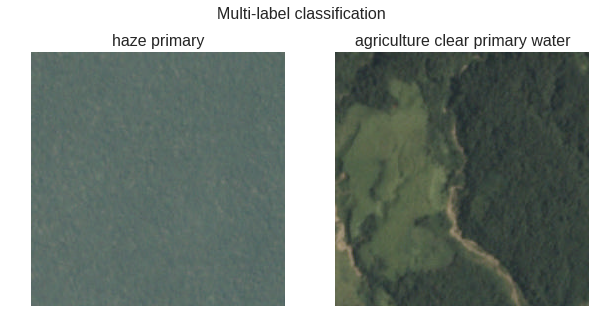

In [10]:
list_paths = [f"{PATH}train_0.jpg", f"{PATH}train_1.jpg"]
titles=["haze primary", "agriculture clear primary water"]
plots_from_files(list_paths, titles=titles, maintitle="Multi-label classification")

In [0]:
image_datasets = MultiLabelDataFolder(train_folder,label_file,
                                      data_transforms)._get_data_folder()

In [0]:
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=64,
                                             shuffle=True, num_workers=0)
              for x in ['train', 'val']}

In [13]:
len(dataloaders['train'])

507

In [0]:
# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

In [30]:
classes[1]

tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         1.,  0.,  0.,  0.,  0.])

In [0]:
class_names = image_datasets['train'].classes

In [32]:
list(zip(class_names, classes[1]))

[('agriculture', tensor(0.)),
 ('artisinal_mine', tensor(0.)),
 ('bare_ground', tensor(0.)),
 ('blooming', tensor(0.)),
 ('blow_down', tensor(0.)),
 ('clear', tensor(0.)),
 ('cloudy', tensor(0.)),
 ('conventional_mine', tensor(0.)),
 ('cultivation', tensor(0.)),
 ('habitation', tensor(0.)),
 ('haze', tensor(1.)),
 ('partly_cloudy', tensor(0.)),
 ('primary', tensor(1.)),
 ('road', tensor(0.)),
 ('selective_logging', tensor(0.)),
 ('slash_burn', tensor(0.)),
 ('water', tensor(0.))]

In [14]:
base_model = torchvision.models.resnet34(pretrained=True)
for param in base_model.parameters():
    param.requires_grad = False

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /content/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:04<00:00, 18610113.37it/s]


In [0]:
base_model.fc = nn.Linear(in_features=base_model.fc.in_features, out_features=17)

In [0]:
from sklearn.metrics import fbeta_score
import warnings
class MyModel(nn.Module):
    def __init__(self, base_model):
        super().__init__()
        self.base_model = base_model
        self.criterion = nn.MultiLabelSoftMarginLoss()
                        
    def forward(self, inputs, **kwargs):
        x = self.base_model(inputs)
        # x = F.log_softmax(x, dim=1)
        return x
    
    def calculate_loss(self, outputs, targets, **kwargs):
        return self.criterion(input=outputs, target=targets)  

    def calculate_metrics(self, outputs, targets, start=0.17, end=0.24, step=0.01, **kwargs):
        targets = targets.cpu().data.numpy()
        outputs = outputs.cpu().data.numpy()
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            return fbeta_score(targets, (outputs>0.2), 2, average='samples')                            

In [0]:
model_conv = MyModel(base_model)

if torch.cuda.is_available():
    model_conv.cuda()

In [0]:
#criterion = nn.MultiLabelSoftMarginLoss()

# Observe that only parameters of final layer are being optimized 
optimizer_conv = optim.Adam(model_conv.base_model.fc.parameters(), lr=0.005, weight_decay=0.001)

In [0]:
train_conv = train.Trainer(model_conv,dataloaders['train'],dataloaders['val'],optimizer_conv)

  0%|          | 0/507 [00:00<?, ?it/s]

Trying learning rates between 1e-05 and 10 over 30 steps (1 epochs)
Epoch 0/0
----------


  0%|          | 1/507 [00:00<05:42,  1.48it/s]

Iteration No:1 Learn rate 1.00E-05 Batch Loss: 0.7864 Batch Accuracy: 0.1769 


  0%|          | 2/507 [00:01<05:30,  1.53it/s]

Iteration No:2 Learn rate 1.58E-05 Batch Loss: 0.7894 Batch Accuracy: 0.1520 


  1%|          | 3/507 [00:01<05:22,  1.56it/s]

Iteration No:3 Learn rate 2.51E-05 Batch Loss: 0.7805 Batch Accuracy: 0.1627 


  1%|          | 4/507 [00:02<05:18,  1.58it/s]

Iteration No:4 Learn rate 3.98E-05 Batch Loss: 0.7617 Batch Accuracy: 0.1994 


  1%|          | 5/507 [00:03<05:15,  1.59it/s]

Iteration No:5 Learn rate 6.31E-05 Batch Loss: 0.7630 Batch Accuracy: 0.1731 


  1%|          | 6/507 [00:03<05:12,  1.60it/s]

Iteration No:6 Learn rate 1.00E-04 Batch Loss: 0.7525 Batch Accuracy: 0.2182 


  1%|▏         | 7/507 [00:04<05:11,  1.61it/s]

Iteration No:7 Learn rate 1.58E-04 Batch Loss: 0.7462 Batch Accuracy: 0.1765 


  2%|▏         | 8/507 [00:04<05:10,  1.61it/s]

Iteration No:8 Learn rate 2.51E-04 Batch Loss: 0.7202 Batch Accuracy: 0.1965 


  2%|▏         | 9/507 [00:05<05:08,  1.61it/s]

Iteration No:9 Learn rate 3.98E-04 Batch Loss: 0.6722 Batch Accuracy: 0.2081 


  2%|▏         | 10/507 [00:06<05:07,  1.62it/s]

Iteration No:10 Learn rate 6.31E-04 Batch Loss: 0.5975 Batch Accuracy: 0.3131 


  2%|▏         | 11/507 [00:06<05:06,  1.62it/s]

Iteration No:11 Learn rate 1.00E-03 Batch Loss: 0.5212 Batch Accuracy: 0.4268 


  2%|▏         | 12/507 [00:07<05:05,  1.62it/s]

Iteration No:12 Learn rate 1.58E-03 Batch Loss: 0.4286 Batch Accuracy: 0.6099 


  3%|▎         | 13/507 [00:08<05:04,  1.62it/s]

Iteration No:13 Learn rate 2.51E-03 Batch Loss: 0.3672 Batch Accuracy: 0.5675 


  3%|▎         | 14/507 [00:08<05:03,  1.62it/s]

Iteration No:14 Learn rate 3.98E-03 Batch Loss: 0.3054 Batch Accuracy: 0.6650 


  3%|▎         | 15/507 [00:09<05:02,  1.62it/s]

Iteration No:15 Learn rate 6.31E-03 Batch Loss: 0.4127 Batch Accuracy: 0.6153 


  3%|▎         | 16/507 [00:09<05:02,  1.63it/s]

Iteration No:16 Learn rate 1.00E-02 Batch Loss: 0.4814 Batch Accuracy: 0.6005 


  3%|▎         | 17/507 [00:10<05:01,  1.63it/s]

Iteration No:17 Learn rate 1.58E-02 Batch Loss: 0.5804 Batch Accuracy: 0.6224 


  4%|▎         | 18/507 [00:11<05:00,  1.63it/s]

Iteration No:18 Learn rate 2.51E-02 Batch Loss: 0.7091 Batch Accuracy: 0.6085 


  4%|▎         | 19/507 [00:11<04:59,  1.63it/s]

Iteration No:19 Learn rate 3.98E-02 Batch Loss: 1.0015 Batch Accuracy: 0.6058 


  4%|▍         | 20/507 [00:12<04:59,  1.63it/s]

Iteration No:20 Learn rate 6.31E-02 Batch Loss: 0.9407 Batch Accuracy: 0.5160 


  4%|▍         | 21/507 [00:12<04:58,  1.63it/s]

Iteration No:21 Learn rate 1.00E-01 Batch Loss: 1.3172 Batch Accuracy: 0.6202 


  4%|▍         | 22/507 [00:13<04:57,  1.63it/s]

Iteration No:22 Learn rate 1.58E-01 Batch Loss: 0.9007 Batch Accuracy: 0.7069 


  5%|▍         | 23/507 [00:14<04:57,  1.63it/s]

Iteration No:23 Learn rate 2.51E-01 Batch Loss: 1.4029 Batch Accuracy: 0.6822 


  5%|▍         | 24/507 [00:14<04:56,  1.63it/s]

Iteration No:24 Learn rate 3.98E-01 Batch Loss: 1.4050 Batch Accuracy: 0.6437 


  5%|▍         | 25/507 [00:15<04:55,  1.63it/s]

Iteration No:25 Learn rate 6.31E-01 Batch Loss: 1.5839 Batch Accuracy: 0.6256 


  5%|▌         | 26/507 [00:15<04:54,  1.63it/s]

Iteration No:26 Learn rate 1.00E+00 Batch Loss: 2.2187 Batch Accuracy: 0.6209 


  5%|▌         | 27/507 [00:16<04:54,  1.63it/s]

Iteration No:27 Learn rate 1.58E+00 Batch Loss: 2.2169 Batch Accuracy: 0.6207 


  6%|▌         | 28/507 [00:17<04:53,  1.63it/s]

Iteration No:28 Learn rate 2.51E+00 Batch Loss: 2.2220 Batch Accuracy: 0.6746 
Iteration No:29 Learn rate 3.98E+00 Batch Loss: 3.2301 Batch Accuracy: 0.6588 


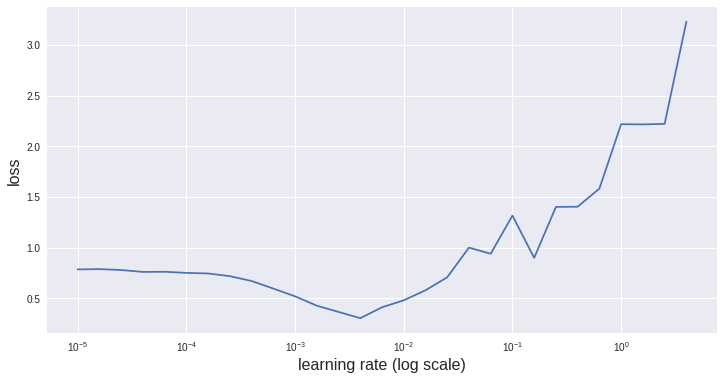

In [22]:
train_conv.lr_find(steps=30)

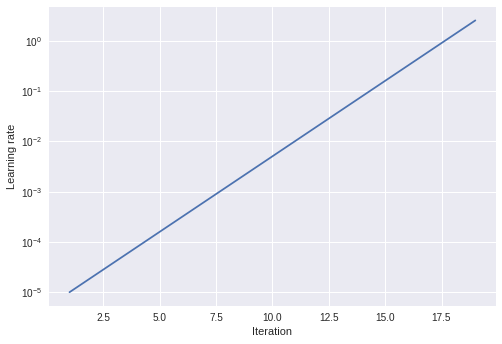

In [40]:
train_conv.plot_lr()

  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 0/2
----------


  0%|          | 0/126 [00:00<?, ?it/s]

train Loss: 0.1788 Acc: 0.7631


100%|██████████| 126/126 [01:08<00:00,  1.85it/s]


val Loss: 0.1517 Acc: 0.8031


  0%|          | 0/507 [00:00<?, ?it/s]


Epoch 1/2
----------


  0%|          | 0/126 [00:00<?, ?it/s]

train Loss: 0.1682 Acc: 0.7802


100%|██████████| 126/126 [01:08<00:00,  1.84it/s]


val Loss: 0.1436 Acc: 0.8046


  0%|          | 0/507 [00:00<?, ?it/s]


Epoch 2/2
----------


  0%|          | 0/126 [00:00<?, ?it/s]

train Loss: 0.1666 Acc: 0.7818


100%|██████████| 126/126 [01:06<00:00,  1.89it/s]


val Loss: 0.1467 Acc: 0.8171

Training complete in 18m 33s
Best val Acc: 0.817063


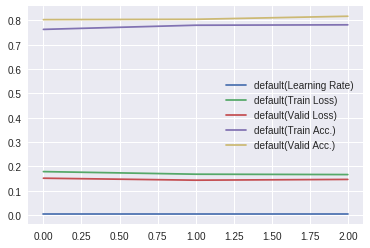

In [25]:
train_conv.train_model(num_epochs=3)

In [0]:
optimizer_conv = optim.Adam(model_conv.base_model.fc.parameters(), lr=0.005, weight_decay=0.001)

  0%|          | 0/507 [00:00<?, ?it/s]

Epoch 0/1
----------


  0%|          | 0/126 [00:00<?, ?it/s]

train Loss: 0.1675 Acc: 0.7816


  0%|          | 0/507 [00:00<?, ?it/s]

val Loss: 0.1586 Acc: 0.7721

Epoch 1/1
----------


  0%|          | 0/126 [00:00<?, ?it/s]

train Loss: 0.1678 Acc: 0.7821


100%|██████████| 126/126 [01:05<00:00,  1.92it/s]


val Loss: 0.1495 Acc: 0.7961

Training complete in 11m 49s
Best val Acc: 0.817063


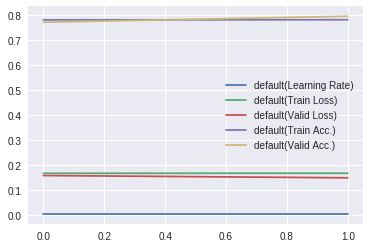

In [29]:
train_conv.train_model(num_epochs=2,optimizer=optimizer_conv)